In [90]:
import pandas as pd

In [91]:
train_df = pd.read_csv("/kaggle/input/indian-sign-language-dataset/Completedataset_Train.csv")
valid_df = pd.read_csv("/kaggle/input/indian-sign-language-dataset/Completedataset_Test.csv")

In [92]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,35,4,5,7,8,9,10,10,10,2,...,9,9,10,10,11,11,8,8,10,11
1,1,11,13,17,20,21,20,18,17,20,...,40,25,16,20,11,15,14,15,16,18
2,30,17,8,4,11,20,20,12,6,15,...,13,13,14,13,13,13,11,12,15,17
3,18,11,13,15,15,13,12,12,13,20,...,10,9,7,6,5,4,7,5,6,11
4,1,10,12,16,19,20,19,17,16,13,...,12,17,19,16,15,17,15,16,17,18


In [93]:
y_train=train_df['label']
y_valid=valid_df['label']
del train_df['label']
del valid_df['label']

In [94]:
x_train=train_df.values
x_valid=valid_df.values

In [95]:
x_train.shape

(33600, 784)

In [96]:
y_train.shape

(33600,)

In [97]:
x_valid.shape

(8400, 784)

In [98]:
y_valid.shape

(8400,)

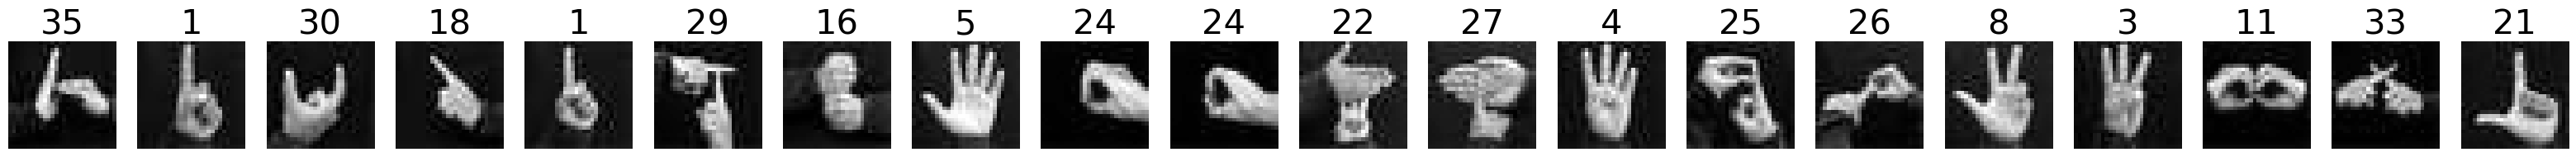

In [99]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40,40))

num_images=20
for i in range(num_images):
    row=x_train[i]
    label=y_train[i]
    
    image=row.reshape(28, 28)
    plt.subplot(1,num_images,i+1)
    plt.title(label, fontdict={'fontsize':30})
    plt.axis('off')
    plt.imshow(image,cmap='gray')

In [100]:
x_train.min()

0

In [101]:
x_train.max()

235

In [102]:
x_train=x_train/255
x_valid=x_valid/255

In [103]:
import tensorflow as tf
import tensorflow.keras as keras
num_categories = 36

In [104]:
import tensorflow
y_train=tensorflow.keras.utils.to_categorical(y_train,num_categories)
y_valid=tensorflow.keras.utils.to_categorical(y_valid,num_categories)

In [105]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [106]:
from tensorflow.keras.layers import Dense, Flatten

# model = Sequential()
# model.add(Flatten(input_shape=(28, 28, 1)))  
# model.add(Dense(units=512, activation='relu'))
# model.add(Dense(units=512, activation='relu'))
# model.add(Dense(units=num_categories, activation='softmax'))

In [107]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[28, 28, 1]))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))  # Adding dropout for regularization
model.add(tf.keras.layers.Dense(units=num_categories, activation='softmax'))


In [108]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [109]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [110]:
x_train_reshaped = x_train.reshape(-1, 28, 28, 1)
x_valid_reshaped = x_valid.reshape(-1, 28, 28, 1)
history = model.fit(x_train_reshaped, y_train, epochs=20, validation_data=(x_valid_reshaped, y_valid))

Epoch 1/20
1050/1050 [==============================] - 6s 4ms/step - loss: 0.2721 - accuracy: 0.9250 - val_loss: 3.8738e-04 - val_accuracy: 1.0000
Epoch 2/20
1050/1050 [==============================] - 5s 5ms/step - loss: 0.0189 - accuracy: 0.9940 - val_loss: 1.3975e-05 - val_accuracy: 1.0000
Epoch 3/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0130 - accuracy: 0.9960 - val_loss: 1.8361e-05 - val_accuracy: 1.0000
Epoch 4/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0097 - accuracy: 0.9970 - val_loss: 6.3309e-06 - val_accuracy: 1.0000
Epoch 5/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0061 - accuracy: 0.9980 - val_loss: 5.3920e-06 - val_accuracy: 1.0000
Epoch 6/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0067 - accuracy: 0.9977 - val_loss: 8.9129e-08 - val_accuracy: 1.0000
Epoch 7/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0058 - accuracy: 0.9980 - val_loss

In [111]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen=ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=False,
)

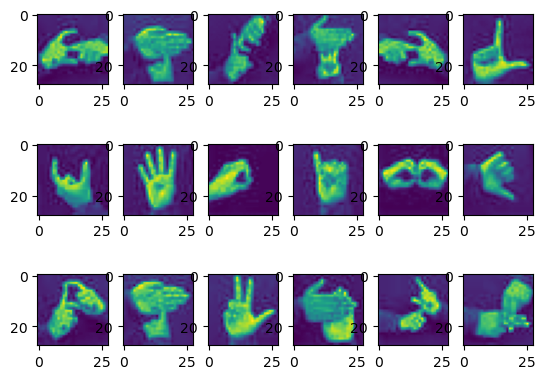

In [112]:
import matplotlib.pyplot as plt
import numpy as np
batch_size=18

x_train_reshaped = x_train.reshape(-1, 28, 28, 1)
x_valid_reshaped = x_valid.reshape(-1, 28, 28, 1)

img_iter=datagen.flow(x_train_reshaped,y_train,batch_size=batch_size)

x,y=img_iter.next()
fig, ax=plt.subplots(nrows=3,ncols=6)
for i in range(batch_size):
    image=x[i]
    ax.flatten()[i].imshow(np.squeeze(image))
plt.show()

In [113]:
datagen.fit(x_train_reshaped)

In [114]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'])

In [115]:
# x, y = img_iter.next()
# print("x shape:", x.shape)
# print("y shape:", y.shape)

In [116]:
x_train_reshaped = x_train_reshaped.astype('float32')
x_train_reshaped /= 255

model.fit(img_iter,
         epochs=20,
         steps_per_epoch=len(x_train_reshaped)//batch_size,
         validation_data=(x_valid_reshaped,y_valid))

# model.fit(datagen.flow(x_train_reshaped, y_train, batch_size=batch_size),
#          epochs=20,
#          steps_per_epoch=len(x_train_reshaped) // batch_size,
#          validation_data=(x_valid_reshaped, y_valid))

Epoch 1/20
1866/1866 [==============================] - 11s 5ms/step - loss: 0.1755 - accuracy: 0.9666 - val_loss: 9.0879e-08 - val_accuracy: 1.0000
Epoch 2/20
1866/1866 [==============================] - 9s 5ms/step - loss: 0.0096 - accuracy: 0.9973 - val_loss: 9.9907e-09 - val_accuracy: 1.0000
Epoch 3/20
1866/1866 [==============================] - 9s 5ms/step - loss: 0.0059 - accuracy: 0.9982 - val_loss: 1.9868e-10 - val_accuracy: 1.0000
Epoch 4/20
1866/1866 [==============================] - 9s 5ms/step - loss: 0.0042 - accuracy: 0.9985 - val_loss: 5.0522e-09 - val_accuracy: 1.0000
Epoch 5/20
1866/1866 [==============================] - 9s 5ms/step - loss: 0.0045 - accuracy: 0.9987 - val_loss: 1.7881e-09 - val_accuracy: 1.0000
Epoch 6/20
1866/1866 [==============================] - 9s 5ms/step - loss: 0.0034 - accuracy: 0.9990 - val_loss: 2.8383e-11 - val_accuracy: 1.0000
Epoch 7/20
1866/1866 [==============================] - 9s 5ms/step - loss: 0.0033 - accuracy: 0.9990 - val_los

In [117]:
model.save('asl_model')

In [118]:
from tensorflow import keras

model = keras.models.load_model('asl_model')

In [119]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [120]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def show_image(image_path):
    image=mpimg.imread(image_path)
    plt.imshow(image,cmap='gray')

In [121]:
# from tensorflow.keras.preprocessing import image as image_utils

# def load_and_scale_image(image_path):
#     image = image_utils.load_img(image_path, color_mode="grayscale", target_size=(28,28))
#     return image

import cv2

def load_and_scale_image(image_path):
    image = image_utils.load_img(image_path, color_mode="grayscale", target_size=(28, 28))
    image_array = image_utils.img_to_array(image)
    
    # Convert the image array to uint8
    image_array = image_array.astype('uint8')
    
    # Apply Gaussian blur to reduce noise
    blurred_image = cv2.GaussianBlur(image_array, (5, 5), 0)
    
    # Apply adaptive thresholding to create a binary mask
    _, thresholded_image = cv2.threshold(blurred_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    return thresholded_image



In [122]:
alphabet = "0123456789abcdefghijklmnopqrstuvwxyz"
dictionary = {}
for i in range(36):
    dictionary[i] = alphabet[i]
dictionary

{0: '0',
 1: '1',
 2: '2',
 3: '3',
 4: '4',
 5: '5',
 6: '6',
 7: '7',
 8: '8',
 9: '9',
 10: 'a',
 11: 'b',
 12: 'c',
 13: 'd',
 14: 'e',
 15: 'f',
 16: 'g',
 17: 'h',
 18: 'i',
 19: 'j',
 20: 'k',
 21: 'l',
 22: 'm',
 23: 'n',
 24: 'o',
 25: 'p',
 26: 'q',
 27: 'r',
 28: 's',
 29: 't',
 30: 'u',
 31: 'v',
 32: 'w',
 33: 'x',
 34: 'y',
 35: 'z'}

1/1 [==============================] - 0s 18ms/step


'a'

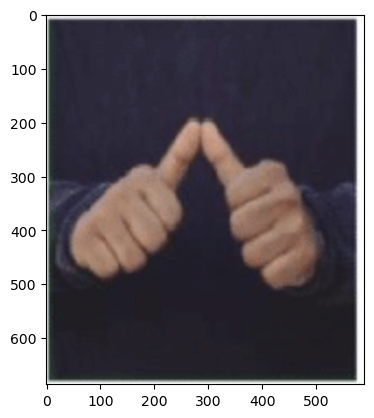

In [129]:
from tensorflow.keras.preprocessing import image as image_utils

def predict_letter(file_path):
    # Show image
    show_image(file_path)
    # Load and scale image
    image = load_and_scale_image(file_path)
    # Convert to array
    image = image_utils.img_to_array(image)
    # Reshape image
    image = image.reshape(1,28,28,1)
    # Normalize image
    image = image / 255
    # Make prediction
    prediction = model.predict(image)
    # Convert prediction to letter
    predicted_letter = dictionary[np.argmax(prediction)]
    # Return prediction
    return predicted_letter   
predict_letter("/kaggle/input/isl-a/a.png")

1/1 [==============================] - 0s 18ms/step


'l'

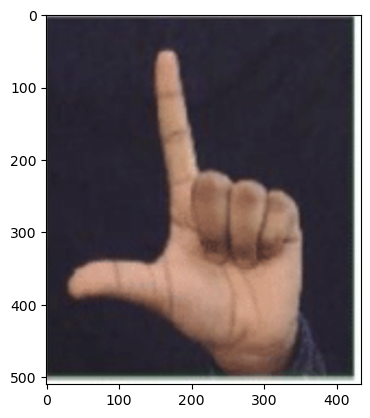

In [130]:
def predict_letter(file_path):
    # Show image
    show_image(file_path)
    # Load and scale image
    image = load_and_scale_image(file_path)
    # Convert to array
    image = image_utils.img_to_array(image)
    # Reshape image
    image = image.reshape(1,28,28,1)
    # Normalize image
    image = image / 255
    # Make prediction
    prediction = model.predict(image)
    # Convert prediction to letter
    predicted_letter = dictionary[np.argmax(prediction)]
    # Return prediction
    return predicted_letter   
predict_letter("/kaggle/input/isl-l/l.png")

1/1 [==============================] - 0s 18ms/step


'4'

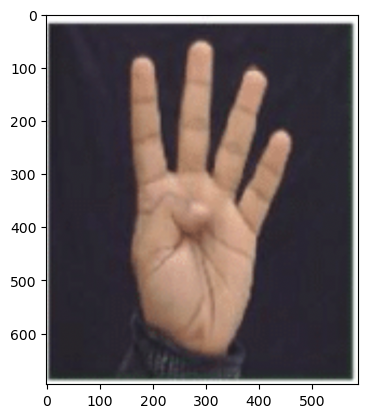

In [131]:
def predict_letter(file_path):
    # Show image
    show_image(file_path)
    # Load and scale image
    image = load_and_scale_image(file_path)
    # Convert to array
    image = image_utils.img_to_array(image)
    # Reshape image
    image = image.reshape(1,28,28,1)
    # Normalize image
    image = image / 255
    # Make prediction
    prediction = model.predict(image)
    # Convert prediction to letter
    predicted_letter = dictionary[np.argmax(prediction)]
    # Return prediction
    return predicted_letter   
predict_letter("/kaggle/input/isl-4/Screenshot 2023-08-04 at 10.52.08 PM.png")

1/1 [==============================] - 0s 28ms/step


'c'

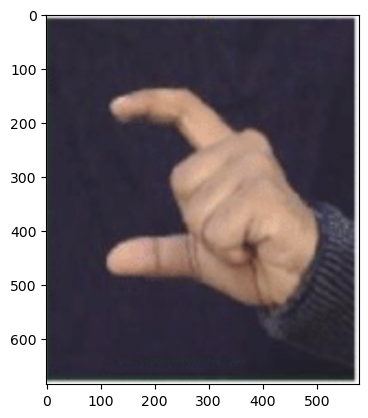

In [132]:
def predict_letter(file_path):
    # Show image
    show_image(file_path)
    # Load and scale image
    image = load_and_scale_image(file_path)
    # Convert to array
    image = image_utils.img_to_array(image)
    # Reshape image
    image = image.reshape(1,28,28,1)
    # Normalize image
    image = image / 255
    # Make prediction
    prediction = model.predict(image)
    # Convert prediction to letter
    predicted_letter = dictionary[np.argmax(prediction)]
    # Return prediction
    return predicted_letter   
predict_letter("/kaggle/input/isl-c/Screenshot 2023-08-04 at 10.51.07 PM.png")

1/1 [==============================] - 0s 18ms/step


'y'

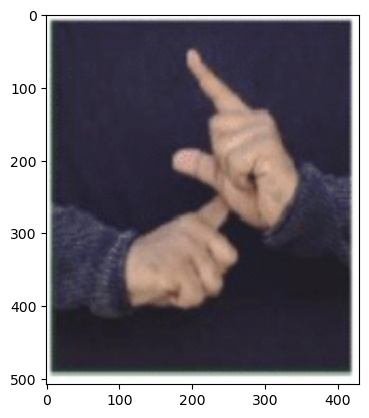

In [138]:
def predict_letter(file_path):
    # Show image
    show_image(file_path)
    # Load and scale image
    image = load_and_scale_image(file_path)
    # Convert to array
    image = image_utils.img_to_array(image)
    # Reshape image
    image = image.reshape(1,28,28,1)
    # Normalize image
    image = image / 255
    # Make prediction
    prediction = model.predict(image)
    # Convert prediction to letter
    predicted_letter = dictionary[np.argmax(prediction)]
    # Return prediction
    return predicted_letter   
predict_letter("/kaggle/input/isl-y/y.png")